# Project: EDA telecommunication churn
### A situation where a customer terminates a membership with one company and becomes a customer of another company is called churn.

#### The main objective of this project is to find the factors that influence customers to churn, identifying this factors will help the company to take appropriate measures to minimize churn rate.

#### Customer churn is a big problem in any industry and one of the most important concerns of the telecommunication industry, this is because of its effect on the revenues of the company. In today's highly competitive industry,there is an average of 15-25% annual churn rate and it costs 5-10 times more to acquire a new customer than to retain an existing one. This is the reason why customer retention has now become even more important than customer acquisition. Therefore finding the factors that increase customer churn is a neccessary step to reduce the churn rate.

In [1]:
#import libraries

#data analysis
import pandas as pd
import numpy as np

#data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#load data set
df=pd.read_csv("telecom_churn.csv")

In [3]:
#to get first 5 rows
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#to get last 5 rows
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
#data dimensionality
df.shape

(3333, 20)

This means that the data set contains 3333 rows and 20 columns/features

In [6]:
#extract the column
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [7]:
#identify data types in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [8]:
#to find missing value
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [9]:
#to find duplicate data
df.duplicated().sum()

0

In [10]:
#to get the details of the values in each column
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

There are no  missing values in the dataset,there are no duplicate values present.

## Understanding the dataset
##### State:There are 51 states contained in this data
##### Account length: Length of the account
##### Area code: Code number of area in the states
##### International plan: Yes indicates subscription to  international plan and  No indicates not subscribed
##### Voice mail plan: Yes indicates subcription to voice mail plan  and No indicates not subscribed
##### Number vmail messages: The number of voice mail messages randes from 0-50
##### Total day minutes: The total number of minutes spent on calls in the morning
##### Total day calls:The total number of calls made in the morning
##### Total day charge:The total charge to customers in the morning
##### Total eve minutes:The total number of minutes spent on calls in the evening
##### Total eve calls:The total number of calls made in the evening
##### Total eve charge:The total charge to customers in the evening
##### Total night minutes:The total number of minutes spent on calls in the night
##### Total night calls:The total number of calls made in the night
##### Total night charge:The total charge to customers in the night
##### Total intl minutes:The total number of minutes of international calls 
##### Total intl calls:The total number of  international calls made 
##### Total intl charge:The total charge to customers who made international calls
##### Customer service calls:The number of customer service calls made by customers
##### Churn:True means customers that churned,False means customers that didnt churn.

In [11]:
# To convert churn boolean row into int 1 or 0 for true or false respectively
# it is called label decoding 
df["Churn"] = df["Churn"].astype("int64")

In [12]:
df.Churn

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

In [13]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [14]:
#There is no outlier

In [15]:
#To get statistical info for categorical data
df.describe(include=["object"])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [16]:
##### i)     What is the rate of customer churn?
##### ii)    How many churn and non churn customer in each state?
##### iii)   Which state have the highest and lowest customer churn?
##### iv)    What is the highest account length?
##### v)     How many customers subscribed to international calls? how many churn?
##### viii)  How mamy customers use the voice mail plan? 
##### ix)    What is the highest number of Vmail message?how many churn?
##### x)     What is the total day,eve,intl,night charge?
##### xi)    What is the total day,eve,intl,night calls?
##### xii)   What is the total intl call, minutes, charge?
##### xiii)  Which area code have the most customer?
##### xiv)   Which area code have the highest rate of customer churn?
##### xv)    The highest customer service call
##### xvi)   Customer service call and the churn rate
##### xvii)  The average usage for retained and churned customers
  

### Analysing Customer churn column

In [17]:
#Find the values (content) of the column
df['Churn'].unique()

array([0, 1], dtype=int64)

In [18]:
#Find the rate of customer churn
data=df["Churn"].value_counts()
data

0    2850
1     483
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Customer churn rate')

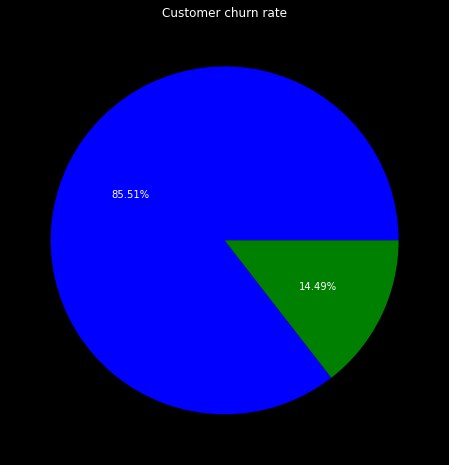

In [19]:
plt.style.use("dark_background")
plt.figure(figsize=(12,8))
colors=["b","g"]
plt.pie(data,colors=colors,autopct= '%0.2f%%')
fontsize = 16
plt.title("Customer churn rate")



The blue colour represents the customers that remain while the green represent the customers that unsubscribed.The false customers(those that left) is less than the true customers(those that stayed).
The telecom company has a low rate of churn. The total number of retained customer is 2850 while 483 are churned customer,approximately 15% of customers churn from the telecom company.

### Analyzing State Column

In [20]:
#To get each state with  the level of churn customers
pd.crosstab(df["Churn"], df["State"])

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,
0,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
1,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


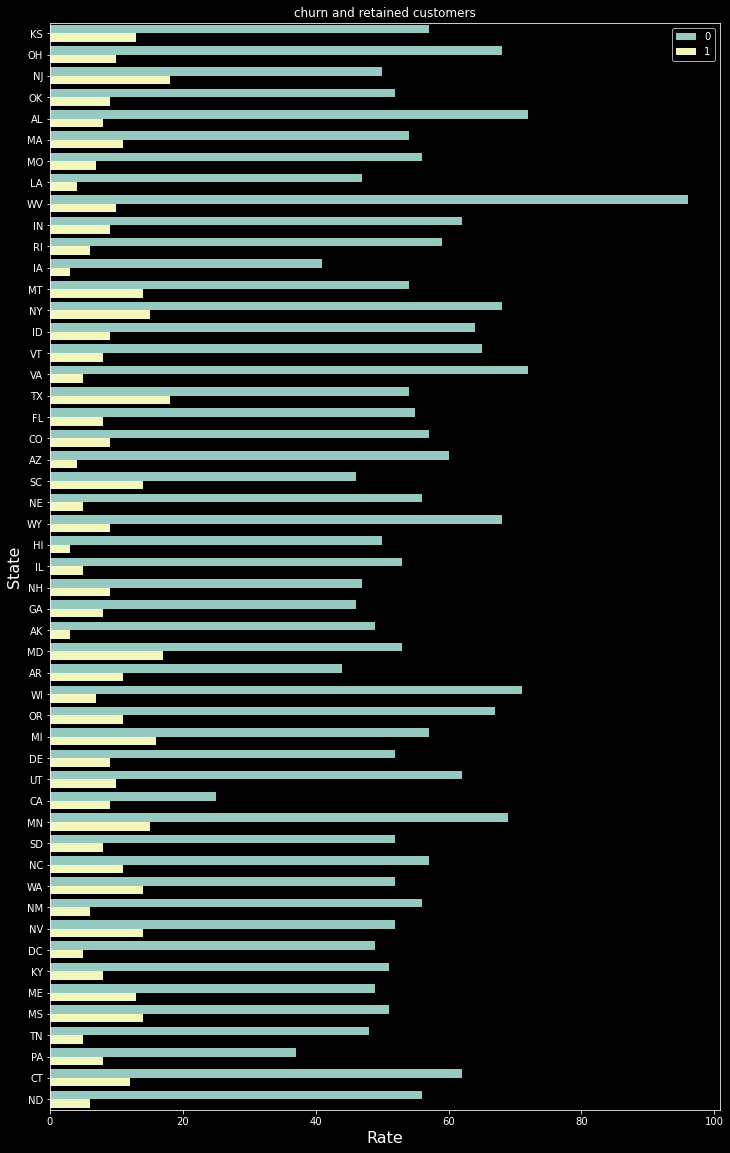

In [21]:
plt.figure(figsize= (12,20))
sns.countplot(y="State",hue="Churn",data=df)
plt.title('churn and retained customers')
plt.ylabel('State', fontsize = 16)
plt.xlabel('Rate', fontsize = 16)
plt.legend()

This is a representation of the level of churn in the different states,0 represents false and that means retained customers while 1 is churned customers.

Text(0.5, 0, 'state')

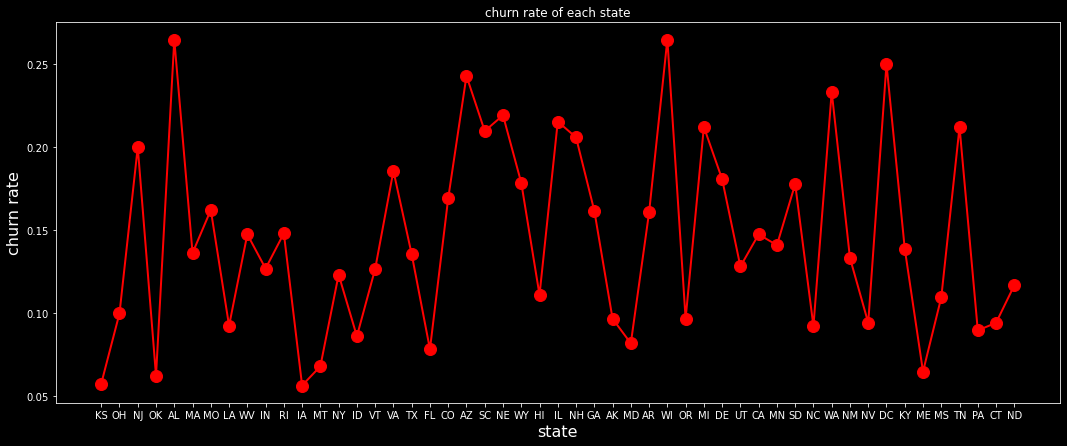

In [22]:
#Churn rate by state
a1=df["State"].unique()
a2=df.groupby(["State"])["Churn"].mean()
plt.rcParams["figure.figsize"]=(18,7)
plt.plot(a1,a2,color="r", marker='o',linewidth=2,markersize=12)  
plt.title('churn rate of each state')
plt.ylabel('churn rate', fontsize = 16)
plt.xlabel('state', fontsize = 16)           
           

In [23]:
# calculate each State vs churn percentage
sd=pd.crosstab(df["State"],df["Churn"])
sd["percentage_Churn"]=sd.apply(lambda x:x[1]*100/(x[0]+x[1]),axis=1)
sd

Churn,0,1,percentage_Churn
State,,,
AK,49,3,5.769231
AL,72,8,10.000000
AR,44,11,20.000000
AZ,60,4,6.250000
CA,25,9,26.470588
CO,57,9,13.636364
CT,62,12,16.216216
DC,49,5,9.259259
DE,52,9,14.754098


0 represents false and 1 represents true, for each state the percentage of customer churn is being represented.

WV is the state with the highest number of retained customer and CA has the lowest number of retained customer.

NJ has the highest number of churn customer,IA,HI,AK,have the lowest churn customers.

CA has the highest percentage of churn customers 26.5% and AK have the lowest churn percentage 5.8%

Text(0, 0.5, 'percentage')

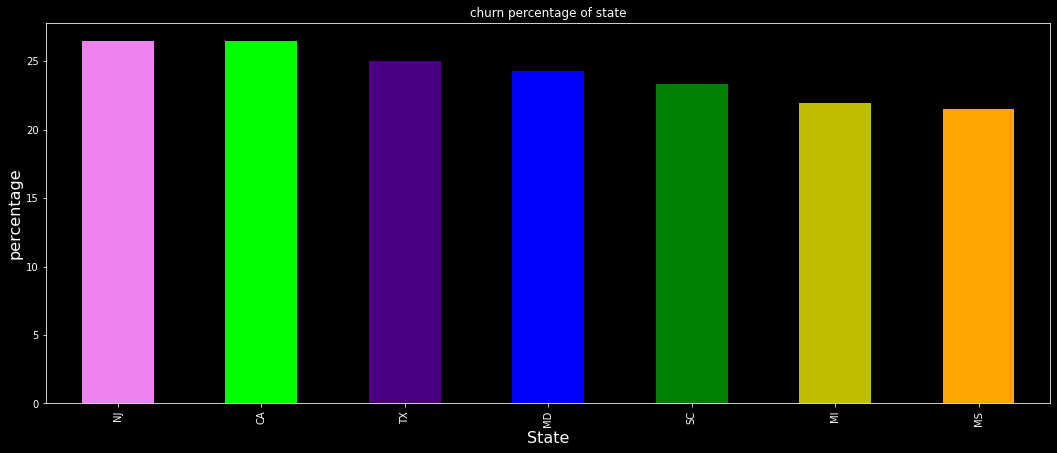

In [24]:
plt.title("churn percentage of state")
plt.rcParams["figure.figsize"]=(18,7)
color=plt.cm.copper(np.linspace(0,0.5,20))
((df.groupby(["State"])["Churn"].mean())*100).sort_values(ascending=False).head(7).plot.bar(color=["violet","lime","indigo","b","g","y", "orange","r"]) 
plt.xlabel("State", fontsize = 16)  
plt.ylabel("percentage", fontsize = 16)
 

        
           

Out of the 51 states,these are the top 7 states with the highest churn percentage in descending order.NJ have the highest number of customer churn followed by CA,TX,MD,SC,MI,MS

### Analysing the account length

In [25]:
#The account length
AL=df["Account length"]
AL

0       128
1       107
2       137
3        84
4        75
       ... 
3328    192
3329     68
3330     28
3331    184
3332     74
Name: Account length, Length: 3333, dtype: int64

In [26]:
data=df.groupby("Churn").count().sort_values(ascending=False,by ="Account length")
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Churn,,,,,,,,,,,,,,,,,,,
0,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850
1,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483


### Analysing the international plan column

In [27]:
#The number customers subscribed to intl plan
data=df["International plan"].value_counts()
data

No     3010
Yes     323
Name: International plan, dtype: int64

Text(0.5, 1.0, 'Intl customer rate')

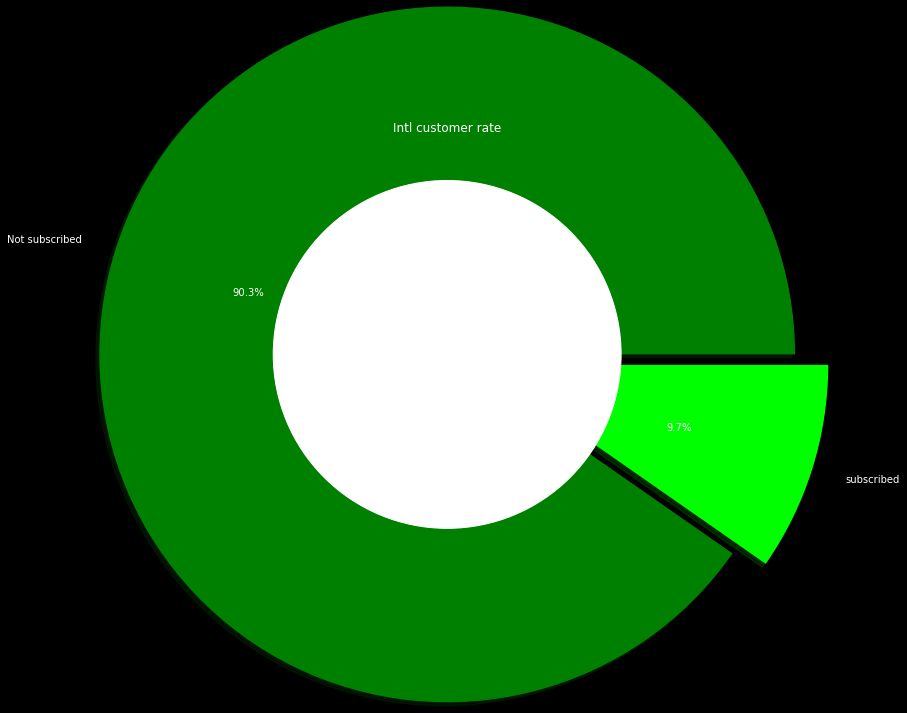

In [28]:
data=df["International plan"].value_counts()
plt.style.use("dark_background")
plt.figure(figsize=(12,8))
colors=["g","lime"]
explode=(0, 0.2)
plt.pie(data,colors=colors,explode=explode,autopct= '%1.1f%%',shadow=True,radius=2.0,labels=['Not subscribed','subscribed'])
circle=plt.Circle((0,0),1,color="white")
p=plt.gcf()
p.gca().add_artist(circle)
fontsize = 16
plt.title("Intl customer rate")



The percentage of customers that are not subscribed to the international plan is much more than the those subscribed to the plan

In [29]:
# customers subscribed to international calls and the churn rate
data=pd.crosstab(df["Churn"], df["International plan"])
data

International plan,No,Yes
Churn,,
0,2664,186
1,346,137


The number of retained customer who are not subcribed to the international call is 2664 while 186 retained customers are subscribed. The total of 2850 retained customer 

The number of churned customer(those that left) who are not subscribed to the international plan are 346 while 137 customers who are subscribed left. The total number of churned customer is 475

<AxesSubplot:xlabel='International plan', ylabel='count'>

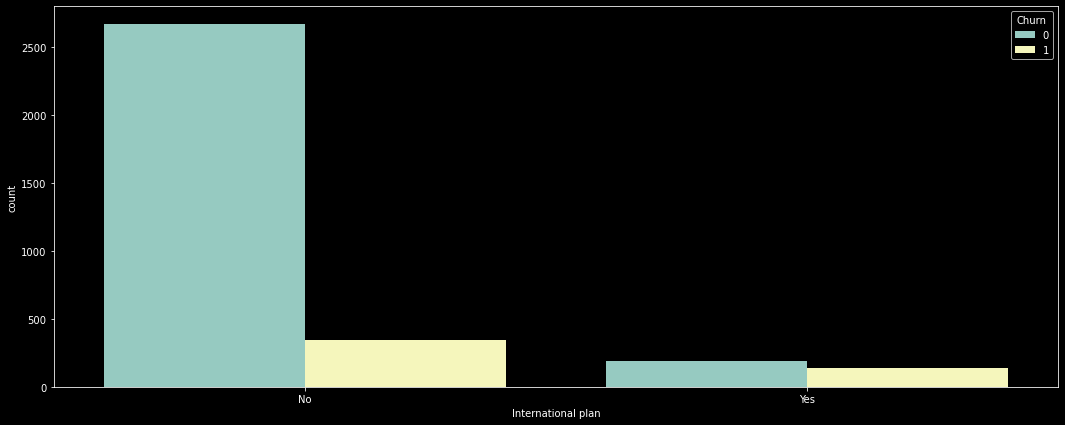

In [30]:
sns.countplot(x="International plan",hue="Churn",data=df)

In [31]:
#To get the percentage of churn for intl plan
IP=pd.crosstab(df["International plan"],df["Churn"])
IP["percentage_Churn"]=IP.apply(lambda x:x[1]*100/(x[0]+x[1]),axis=1)
IP

Churn,0,1,percentage_Churn
International plan,,,
No,2664,346,11.495017
Yes,186,137,42.414861


From the above diagram and analysis, we see that 3010 customers are not subscribed to the intl plan and only 346 of them left making a low churn rate of 11.49.

On the other hand,few customers are subscribed to the intl plan and a high percentage of these customers churn which is 42.41. 
The customers who are not subscribed to the intl calls are retained but customers who are subscribed to intl calls tend to leave.

### Analysing voice mail plan

Text(0.5, 1.0, 'Voice mail plan')

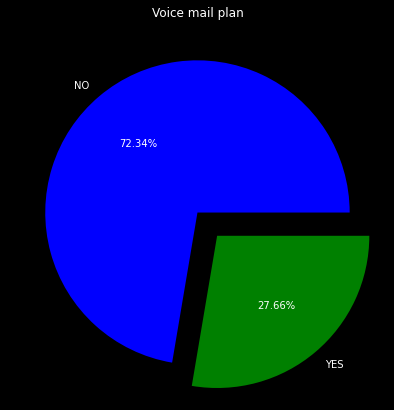

In [32]:
# customers subcribed to voice mail plan and churn rate
data=df["Voice mail plan"].value_counts()
explode=(0,0.2)
labels=["NO","YES"]
colors=["b","g"]
plt.pie(data,colors=colors,labels=labels,explode=explode,autopct= '%0.2f%%')
fontsize = 16
plt.title("Voice mail plan")



In [33]:
#The highest number of Vmail message
data=df.sort_values(by="Number vmail messages", ascending=False).head()
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
845,FL,144,415,No,Yes,51,283.9,98,48.26,192.0,109,16.32,196.3,85,8.83,10.0,4,2.70,1,0
2887,OR,134,415,No,Yes,50,208.8,130,35.50,132.9,104,11.30,136.7,107,6.15,11.1,4,3.00,2,0
2716,WV,137,510,No,Yes,50,186.5,94,31.71,178.0,106,15.13,215.6,100,9.70,12.1,4,3.27,2,0
1596,AR,63,510,No,Yes,49,214.9,86,36.53,198.2,89,16.85,170.8,139,7.69,8.2,5,2.21,0,0
268,MO,64,510,No,Yes,48,94.4,104,16.05,136.2,101,11.58,147.4,89,6.63,4.5,4,1.22,0,0


In [34]:
#The number of voice mail messages and the churn rate
data=df.sort_values(by=["Churn","Number vmail messages"], ascending=False).head(10)
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
277,SD,144,408,No,Yes,48,189.8,96,32.27,123.4,67,10.49,214.2,106,9.64,6.5,2,1.76,2,1
1269,FL,55,510,No,Yes,45,130.5,114,22.19,208.4,94,17.71,141.6,114,6.37,11.0,5,2.97,4,1
1454,UT,133,408,No,Yes,44,174.0,80,29.58,209.4,113,17.80,224.1,87,10.08,14.1,7,3.81,2,1
3246,NC,77,408,Yes,Yes,44,103.2,117,17.54,236.3,86,20.09,203.5,101,9.16,11.9,2,3.21,0,1
115,ME,36,510,Yes,Yes,42,196.8,89,33.46,254.9,122,21.67,138.3,126,6.22,20.0,6,5.40,0,1
1030,VA,99,415,No,Yes,42,216.0,125,36.72,232.3,104,19.75,215.5,100,9.70,9.3,4,2.51,2,1
1935,MD,108,415,Yes,Yes,42,130.1,90,22.12,167.0,128,14.20,244.7,80,11.01,13.6,5,3.67,3,1
3287,KS,170,415,No,Yes,42,199.5,119,33.92,135.0,90,11.48,184.6,49,8.31,10.9,3,2.94,4,1
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,1
547,VT,95,510,Yes,Yes,41,136.8,91,23.26,200.8,61,17.07,133.7,67,6.02,10.3,9,2.78,5,1


### Analysing the cost of day,eve,night, and international calls

In [35]:
#The sum of total day charge, eve charge, intl charge,night charge.
df.pivot_table(["Total day charge", "Total eve charge", "Total night charge" ,"Total intl charge"], ["State"], aggfunc="sum")


,Total day charge,Total eve charge,Total intl charge,Total night charge
State,,,,
AK,1576.94,814.54,140.68,450.05
AL,2529.72,1329.16,222.32,674.23
AR,1646.70,939.93,154.04,508.52
AZ,1867.08,1021.37,183.72,558.76
CA,1061.01,575.06,90.63,303.72
CO,2005.20,1160.60,175.94,564.04
CT,2203.30,1282.12,200.79,686.01
DC,1573.31,900.94,154.69,501.43
DE,1810.49,1079.78,169.48,559.71


In [36]:
day=df["Total day charge"].mean()/df["Total day minutes"].mean()
eve=df["Total eve charge"].mean()/df["Total eve minutes"].mean()
night=df["Total night charge"].mean()/df["Total night minutes"].mean()
intll=df["Total intl charge"].mean()/df["Total intl minutes"].mean()
print([day,eve,night,intll])

[0.1700030073913066, 0.08500104871485774, 0.04500041448440013, 0.2700500279887098]


Text(0.5, 1.0, 'day,eve,night,intl cost')

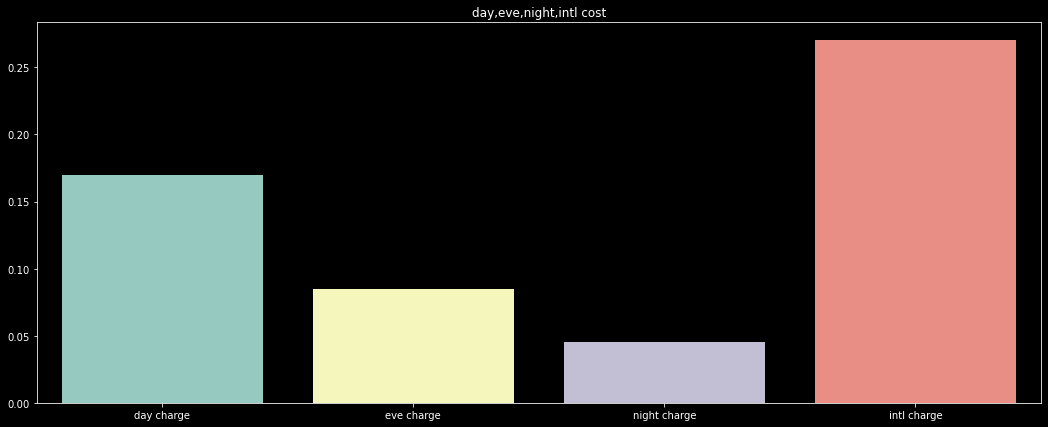

In [37]:
sns.barplot(x=["day charge","eve charge","night charge","intl charge"],y=[day,eve,night,intll])
plt.title("day,eve,night,intl cost")

In [38]:
#The average of  total day call,evening call,night call and international call by state
df.pivot_table(["Total day calls", "Total eve calls", "Total night calls","Total intl calls"], ["State"], aggfunc="mean")

,Total day calls,Total eve calls,Total intl calls,Total night calls
State,,,,
AK,95.269231,96.576923,4.807692,97.346154
AL,99.100000,98.462500,4.700000,98.612500
AR,102.145455,97.836364,4.690909,99.054545
AZ,100.109375,102.406250,4.859375,99.984375
CA,104.500000,103.088235,4.441176,99.205882
CO,95.121212,98.166667,4.106061,97.060606
CT,98.432432,99.121622,4.108108,102.283784
DC,100.166667,101.981481,3.907407,97.666667
DE,98.639344,97.360656,4.295082,101.213115


In [39]:
day1=df["Total day calls"].mean()/df["Total day minutes"].mean()
eve1=df["Total eve calls"].mean()/df["Total eve minutes"].mean()
night1=df["Total night calls"].mean()/df["Total night minutes"].mean()
intll1=df["Total intl calls"].mean()/df["Total intl minutes"].mean()
print([day1,eve1,night1,intll1])

[0.5586738372310365, 0.4981298540382986, 0.49836558718996726, 0.43756172902824975]


Text(0.5, 1.0, 'day,eve,night,intl call')

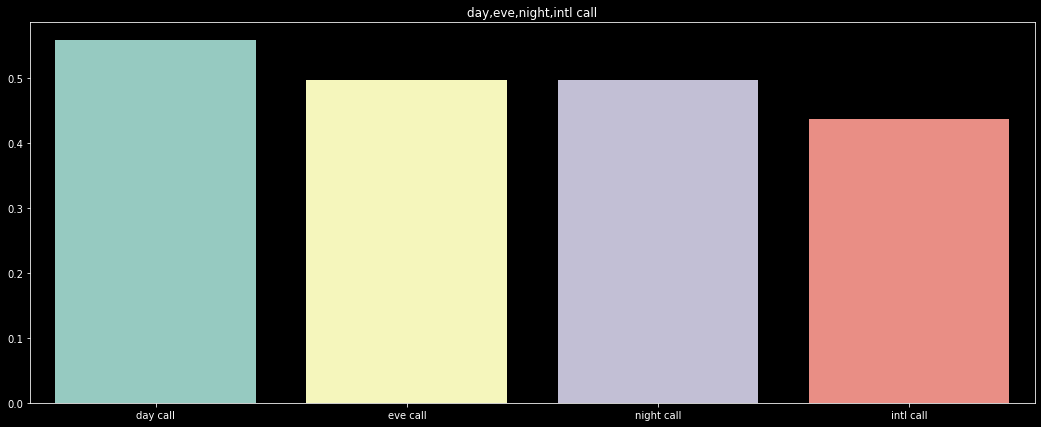

In [40]:
sns.barplot(x=["day call","eve call","night call","intl call"],y=[day1,eve1,night1,intll1])
plt.title("day,eve,night,intl call")

In [41]:
#The average total intl call, minute and charge by state
df.pivot_table(["Total intl minutes", "Total intl calls", "Total intl charge"], ["State"], aggfunc="mean")

,Total intl calls,Total intl charge,Total intl minutes
State,,,
AK,4.807692,2.705385,10.019231
AL,4.700000,2.779000,10.292500
AR,4.690909,2.800727,10.372727
AZ,4.859375,2.870625,10.631250
CA,4.441176,2.665588,9.867647
CO,4.106061,2.665758,9.871212
CT,4.108108,2.713378,10.050000
DC,3.907407,2.864630,10.605556
DE,4.295082,2.778361,10.285246


In [42]:
intl1=df["Total intl charge"].mean()/df["Total intl minutes"].mean()
intl2=df["Total intl charge"].mean()/df["Total intl calls"].mean()
print([intl1,intl2])

[0.2700500279887098, 0.6171701272605469]


<AxesSubplot:>

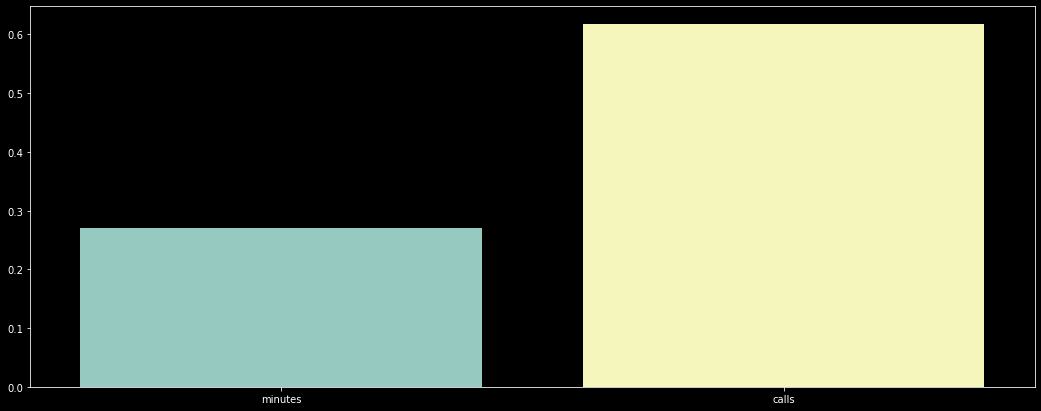

In [43]:
sns.barplot(x=["minutes","calls"],y=[intl1,intl2])

Day calls are made than the other calls while international calls is the least

international calls have the highest call charges while night calls have the least call charge.

This explains the reason for the high rate of churn by customers who subscribed to the international call,the international is expensive and perhaps doesnt meet the needs of customer.



### Analysing Area code column

In [44]:
#calculate area code vs churn percentage
AC=pd.crosstab(df["Area code"],df["Churn"])
AC["percentage_Churn"]=AC.apply(lambda x:x[1]*100/(x[0]+x[1]),axis=1)
AC

Churn,0,1,percentage_Churn
Area code,,,
408,716,122,14.558473
415,1419,236,14.259819
510,715,125,14.880952


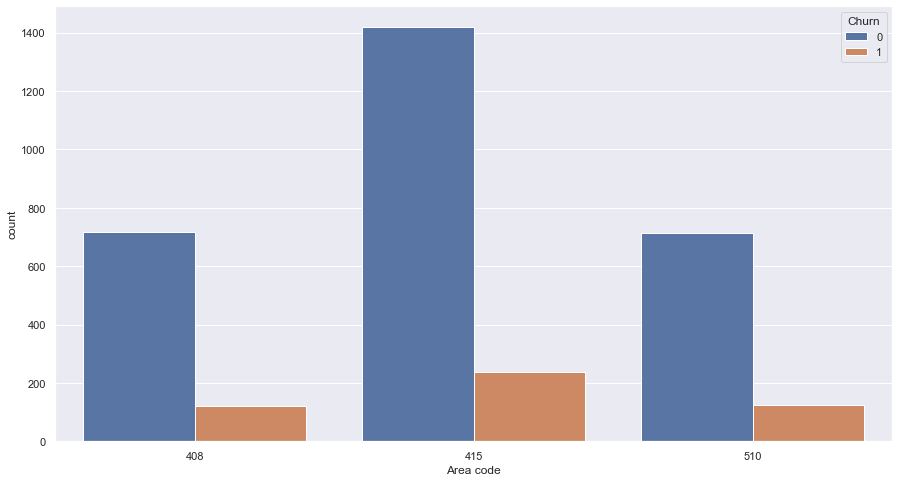

In [45]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
AX=sns.countplot(x="Area code",hue="Churn",data=df)

From the data,there are only 3 unique values which are 408,415 and 510 and the churn rate are almost the same,although 415 has the highest churn rate.

### Analysing customer service calls

In [46]:
df["Customer service calls"].unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8], dtype=int64)

In [47]:
df["Customer service calls"].nunique()

10

In [48]:
df["Customer service calls"].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
8       2
9       2
Name: Customer service calls, dtype: int64

In [49]:
df["Customer service calls"].describe()

count    3333.000000
mean        1.562856
std         1.315491
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: Customer service calls, dtype: float64

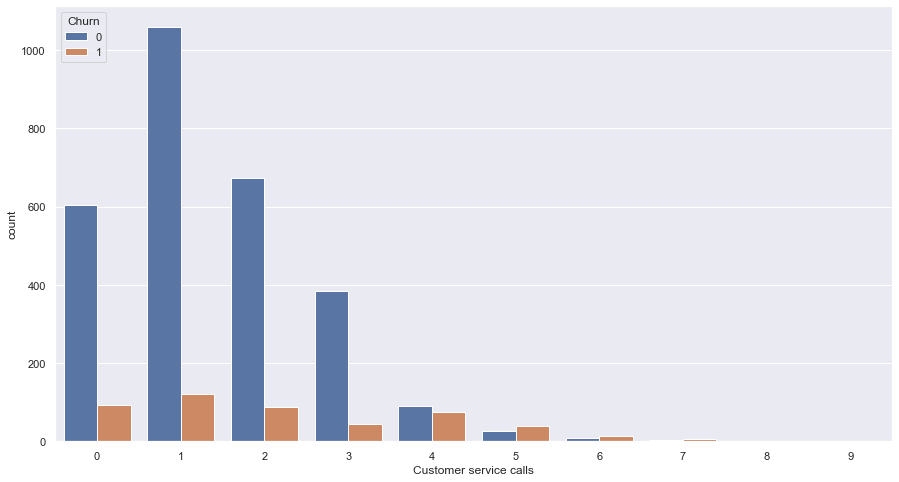

In [50]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
CS=sns.countplot(x="Customer service calls",hue="Churn",data=df)

The higher the number of customer service calls the higher the churn rate,this means that customers who find difficulty with the service churn faster than those who do not.

### The average usage for retained and churned customers

In [51]:
#To get the mean of numerical features for retained users
df[df["Churn"] == 0].mean()

Account length            100.793684
Area code                 437.074737
Number vmail messages       8.604561
Total day minutes         175.175754
Total day calls           100.283158
Total day charge           29.780421
Total eve minutes         199.043298
Total eve calls           100.038596
Total eve charge           16.918909
Total night minutes       200.133193
Total night calls         100.058246
Total night charge          9.006074
Total intl minutes         10.158877
Total intl calls            4.532982
Total intl charge           2.743404
Customer service calls      1.449825
Churn                       0.000000
dtype: float64

In [52]:
# To get the mean of numerical features for churn users
df[df["Churn"] == 1].mean()

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64